In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
times = 12

In [3]:
def linear_reg(X, Y):
    XTX = np.dot(X.T, X)
    XTX_inverse = np.linalg.inv(XTX)
    XTY = np.dot(X.T, Y)
    w_lin = np.dot(XTX_inverse, XTY)
    return w_lin

In [536]:
def logistic_reg(X,Y):
    eta = 0.1
    T = 500
    W = np.zeros((3, 1))
    Y = Y[:, np.newaxis]
    for _ in range(T):
        YWX = np.dot(X, W) * Y
        theta_s = 1.0 / (1 + np.exp(YWX))
        gradient = np.dot(-X.T, Y * (theta_s)) / len(Y)
        W = W - eta * gradient
    return W
    

In [537]:
W = np.zeros((3, 1))
X = X_train
Y= Y_train
YWX = np.dot(X, W) * Y[:, np.newaxis]
theta_s = 1.0 / (1 + np.exp(-YWX))
gradient = np.dot(-X.T, Y[:, np.newaxis] * (1 - theta_s)) / len(Y)
W = W - 1 * gradient
print(gradient.shape)
# W = W - 1 * gradient


(3, 1)


In [538]:

def generate_data(seed_num):

    # Set the random seed for reproducibility
    np.random.seed(seed_num)

    # Number of training examples (N)
    N = 256

    # Number of test examples
    N_test = 4096

    # Initialize empty arrays for training and test data
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []

    # Generate training data
    for _ in range(N):
        # Step 1: Flip a fair coin to get either y = +1 or y = -1
        y = np.random.choice([1, -1])
        
        # Step 2: Generate x based on the value of y
        if y == 1:
            mean = [3, 2]
            cov = [[0.4, 0], [0, 0.4]]
        else:
            mean = [5, 0]
            cov = [[0.6, 0], [0, 0.6]]
        
        x = np.random.multivariate_normal(mean, cov)
        
        # Append to training data
        X_train.append(np.insert(x, 0, 1))
        Y_train.append(y)

    # Generate test data
    for _ in range(N_test):
        # Step 1: Flip a fair coin to get either y = +1 or y = -1
        y = np.random.choice([1, -1])
        
        # Step 2: Generate x based on the value of y
        if y == 1:
            mean = [3, 2]
            cov = [[0.4, 0], [0, 0.4]]
        else:
            mean = [5, 0]
            cov = [[0.6, 0], [0, 0.6]]
        
        x = np.random.multivariate_normal(mean, cov)
        
        # Append to test data
        X_test.append(np.insert(x, 0, 1))
        Y_test.append(y)

    # Convert data to numpy arrays
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    
    # Now, X_train, Y_train, X_test, and Y_test contain the generated training and test data as described.
    # print(X_train)
    return(X_train, Y_train, X_test, Y_test)


In [539]:
X_test

array([[ 1.        ,  5.40312611, -0.50993593],
       [ 1.        ,  4.62440565, -0.98283355],
       [ 1.        ,  3.2315844 , -0.94710622],
       ...,
       [ 1.        ,  3.62518984,  2.44779236],
       [ 1.        ,  5.36060193,  1.04432683],
       [ 1.        ,  3.32479984,  1.88945655]])

In [540]:
W_B

array([[ -27.36028505],
       [-137.63452412],
       [  -4.01659659]])

In [541]:
E_out_A = []
E_out_B = []
for i in range(times):
    X_train, Y_train, X_test, Y_test = generate_data(i)
    # print(Y_train.shape)
    W_A = linear_reg(X_train, Y_train)
    W_B = logistic_reg(X_train,Y_train)
    # print(W_lin)
    predicted_values_A = np.sign(np.dot(X_test, W_A))
    predicted_values_B = np.sign(np.dot(X_test, W_B))
    # print(W_A, W_B)
    # Calculate the 0/1 error
    zero_one_error_A = np.sum(predicted_values_A != Y_test)
    zero_one_error_B = np.sum(predicted_values_B != Y_test[:, np.newaxis])
    mbe_A = np.mean(zero_one_error_A)
    mbe_B = np.mean(zero_one_error_B)
    
    E_out_A.append(mbe_A)
    E_out_B.append(mbe_B)


    

In [542]:
(Y_test).shape

(4096,)

The median number of E_out_A: 102.5
The median number of E_out_B: 150.5


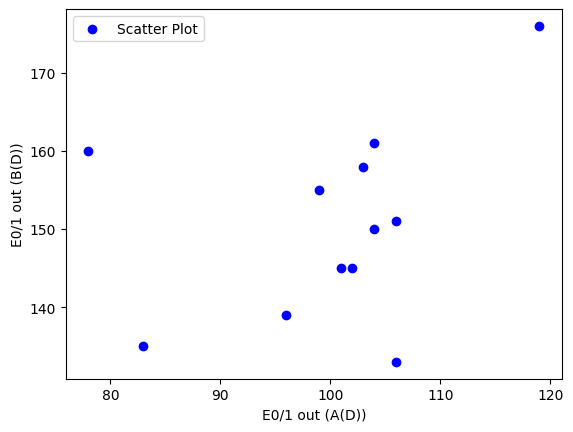

In [543]:
print(f'The median number of E_out_A: {np.median(E_out_A)}')
print(f'The median number of E_out_B: {np.median(E_out_B)}')
plt.scatter(E_out_A, E_out_B, c='blue', marker='o', label='Scatter Plot')

# Label the axes
plt.xlabel('E0/1 out (A(D))')
plt.ylabel('E0/1 out (B(D))')

# Add a legend
plt.legend()

# Show the plot
plt.show()